In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

The below function is from: https://pjreddie.com/projects/mnist-in-csv/

In [145]:
# def convert(imgf, labelf, outf, n):
#     f = open(imgf, "rb")
#     o = open(outf, "w")
#     l = open(labelf, "rb")

#     f.read(16)
#     l.read(8)
#     images = []

#     for i in range(n):
#         image = [ord(l.read(1))]
#         for j in range(28*28):
#             image.append(ord(f.read(1)))
#         images.append(image)

#     for image in images:
#         o.write(",".join(str(pix) for pix in image)+"\n")
#     f.close()
#     o.close()
#     l.close()

# convert("train-images.idx3-ubyte", "train-labels.idx1-ubyte",
#         "mnist_train.csv", 60000)
# convert("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte",
#         "mnist_test.csv", 10000)


In [146]:
df_train = pd.read_csv('mnist_train.csv', header=None)
df_test = pd.read_csv('mnist_test.csv', header=None)

In [147]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df_test.head()
# df_test = df_test.head() #this is to test to make sure the knn predict is just taking long to process
# df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [150]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# sns.pairplot(df_train,hue='5',palette='coolwarm')

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit(df_train.drop(0, axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
scaler.fit(df_test.drop(0, axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
scaled_train_features = scaler.transform(df_train.drop(0, axis=1))

In [157]:
scaled_test_features = scaler.transform(df_test.drop(0, axis=1))

In [158]:
df_train_feat = pd.DataFrame(scaled_train_features,columns=df_train.columns[1:])
df_train_feat.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df_test_feat = pd.DataFrame(scaled_test_features,columns=df_test.columns[1:])
df_test_feat.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn = KNeighborsClassifier(n_neighbors=1)

In [162]:
X_train = df_train_feat
y_train = df_train[0]

In [163]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [169]:
X_test = df_test_feat
y_test= df_test[0]

In [165]:
pred = knn.predict(X_test)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

In [171]:
print(confusion_matrix(y_test, pred))

[[ 962    1    1    2    2    4    6    1    1    0]
 [   0 1127    3    1    1    0    2    0    0    1]
 [  13    7  961   19    5    0    1   12   10    4]
 [   0    0    2  951    2   20    1   11   17    6]
 [   1   10    5    1  920    1    5    5    3   31]
 [   4    0    1   31    5  812   12    1   18    8]
 [  13    4    1    1    4    4  930    0    1    0]
 [   0   15   13    5    6    1    0  955    1   32]
 [  15    2    8   21    8   29    3    8  873    7]
 [   4    4    6    9   20    5    0   33    4  924]]


In [172]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.91      0.94      0.93      1010
           4       0.95      0.94      0.94       982
           5       0.93      0.91      0.92       892
           6       0.97      0.97      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.94      0.90      0.92       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [176]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

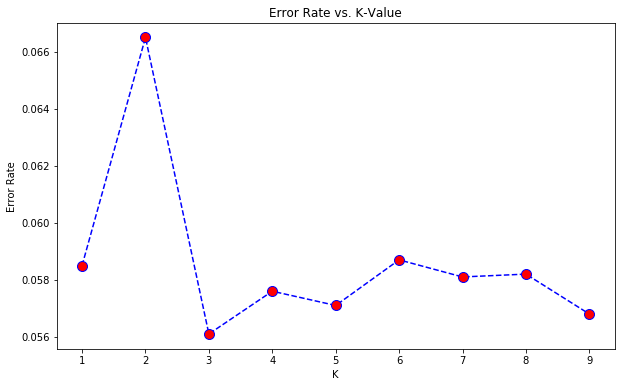

In [181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker = 'o',markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [185]:
#using new k value
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('With K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With K=3


[[ 965    0    2    2    0    6    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  14    8  966   15    3    0    5   11    9    1]
 [   0    4    4  964    2   13    0   12    8    3]
 [   2    9    7    1  916    2    7    4    3   31]
 [   6    0    5   25    5  823   11    2    7    8]
 [  13    4    2    0    3    9  925    0    2    0]
 [   0   24   11    4    7    3    0  954    1   24]
 [  15    3   10   22    9   21    3    7  877    7]
 [   7    6    5   11   19    7    0   29    3  922]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.93      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94